<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #2: ARMA, ARIMA

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Напишите уравнение временного ряда (в виде $y_t=f\left(y_{t-1}, \dots, y_1,~\varepsilon_{t},\dots, \varepsilon_{1}\right)$) которая соответствует модели:
   * 1) ARIMA $(p=0,d=k,q=1)$,
     - $$(1 - B)^k y_t = e_t + \theta_1 e_{t - 1}$$
     $$(1 - B)^k y_t = \Sigma_0^k C_k^i(-1)^iy_{t-i} = e_t + \theta_1 e_{t - 1}$$
     $$y_t = \Sigma_1^k C_k^i(-1)^{(i + 1)}y_{t-i} + e_t + \theta_1 e_{t - 1}$$
   * 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,
     - $$(1 - \Phi_1 B^s)(1 - B^s)(1 - B)^{(k + 1)} y_t = (1 + \theta_1 B) e_t$$ 
     $$X = \Sigma_1^{(k + 1)}(-1)^i B^{(t - i)}$$
     $$Y = \Phi_1 B^s$$
     $$Z = B^s$$
     $$y_t = (- YZ + ZC + YX - YZX + Y + Z - X)y_t + (1 + \theta_1 B) e_t $$

**Вопрос 2**  Write canonic form of ARIMA model for the time series
 - 1) $$y_t = a_1 y_{t-1} + a_2 y_{t-4} - a_1 a_2 y_{t-5} + \varepsilon_t$$ 
 $$ARIMA(1, 0, 0)(1, 0, 0)_s$$
 (Hint: seasnality period is equal to 4).
 - 2) $$y_t = y_{t-d} + \varepsilon_t +b_2 \varepsilon_{t-2} + B_1 \varepsilon_{t-s} + b_2 B_1 \varepsilon_{t-s-2} $$
 $$ARIMA(d, 0, 2)(0, 0, 1)_s$$

**Вопрос 3** Покажите, что ARIMA$(p=0,d=2, q=2)$ эквивалентна модели Хольта (linear trend) при условиях:
		$$(1-В)^2Y_t = (1-\phi_1 В-\phi_2 В^2)\varepsilon_t$$
		$$\phi_1 = 2-\alpha-\alpha\beta, \text{ }\phi_2 = \alpha-1$$

**Вопрос 4**: Покажите, что для модели  
    $$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$**  
    где $y_t$ стационарный процесс с нулевым средним,$~~$
    $\phi_1,\dots,\phi_p$ - константы ($\phi_p \neq 0$), $~~$
    $\varepsilon_t$ несмещённый гауссовский шум с дисперсией $\sigma_\varepsilon^2 $
выолнено:

   * a) частный коэффициент автокорреляции
   $$\phi_{\tau\tau} = \mathsf{E}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau,p)>0 &, 0\leq\tau\leq p. \end{cases}$$
	
  где $\hat y_t$ - прогноз $y_t$ согласно следующей регрессионной модели $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
    $\hat y_{t+\tau}$ - forecast of $y_{t\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<Ответ>

**Вопрос 5**: Покажите, что для модели 
$$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$ 
   где $y_t$ стационарный процесс с нулевым средним,$~~$
     $\theta_1,\dots,\theta_q$ - константы ($\theta_q \neq 0$), $~~$
    $\varepsilon_t$ несмещённый гауссовский шум с дисперсией $\sigma_\varepsilon^2 $
выолнено:

* a) коэффициент корреляции
   $$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$
   
<Answer>

**Вопрос 6** . Conclude in accordance with results above how to choose $p$ and $q$ parameters for ARMA model by looking at ACF and PACF.

<Ответ>

PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (10%)</h2>
* 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in the shop #36 of one real Retail Net, each TS correspond to an item in this shop )
* 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in this shop)
* 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in this shop)

All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShb8iJuzFHOeXR11wOg'>link</a> 

* For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot each time series
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
ts1 = pd.read_csv('data/TS_dep36.csv', sep=';', decimal=',', parse_dates=True, dayfirst=True, index_col='Timestamp')

In [44]:
ts1.head()

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0.000,0.000,2.484,0.000,0.0,1.334,1,1,2.0,0,...,7,12,0.0,66.324,32.864,12,23,63,14,177
2005-05-13,0.878,0.983,2.632,1.120,1.0,3.514,4,0,1.0,0,...,16,17,0.0,69.952,34.024,24,30,97,13,63
2005-05-14,0.332,1.346,2.016,0.302,1.0,2.590,0,2,0.0,1,...,11,12,0.0,35.366,31.626,20,0,80,12,94
2005-05-15,0.000,0.556,0.882,0.000,4.0,1.708,1,1,1.0,2,...,9,15,0.0,37.898,43.726,20,0,64,6,105
2005-05-16,0.438,0.671,0.314,1.486,2.0,2.790,3,0,2.0,1,...,11,11,0.0,49.566,34.548,23,0,43,4,51


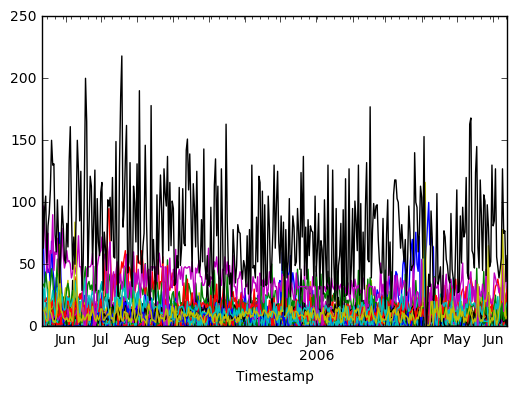

In [62]:
for column in range(len(ts1.columns)):
    ts1.loc[:, ts1.columns[column]].plot()
plt.show()

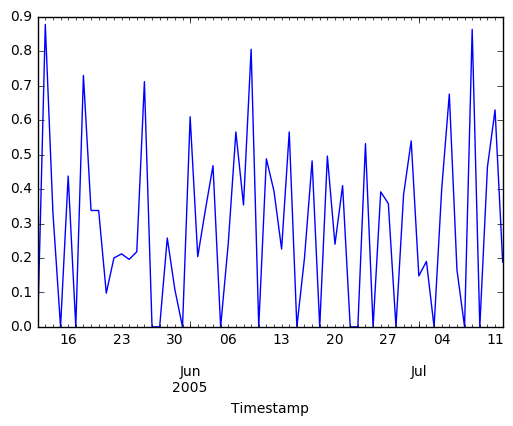

In [65]:
for column in range(len(ts1.columns))[:1]:
    ts1.loc['2005-05-12':'2005-07-12', ts1.columns[column]].plot()
plt.show()

Не вижу ни сезонности, ни трендаб ни изменений в уровне. Если и есть, то они хорошо спрятаны.

In [68]:
ts2 = pd.read_csv('data/TS_dep42.csv', sep=';', decimal='.', parse_dates=True, dayfirst=True, index_col='Timestamp')

In [69]:
ts2.head()

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


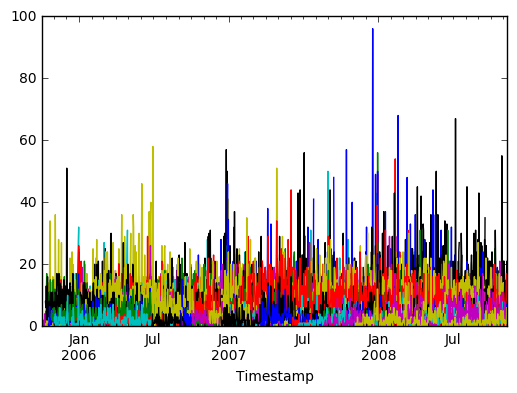

In [76]:
for column in range(len(ts2.columns)):
    try:
        ts2.loc[:, ts2.columns[column]].plot()
    except:
        pass
plt.ylim([0, 100])
plt.show()

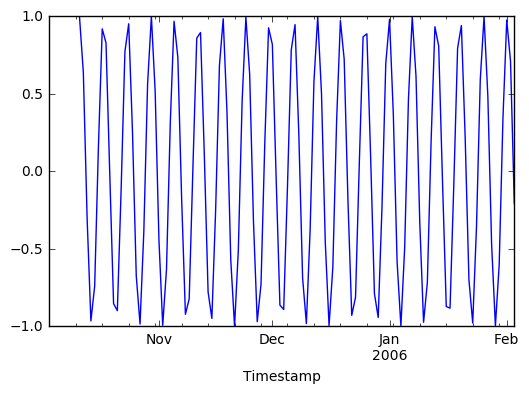

In [81]:
for column in range(len(ts2.columns))[:1]:
    ts2.loc['2005-10-03':'2006-02-03', ts2.columns[column]].plot()
plt.show()

Без тренда и изменений в уровне, вроде. Но сезонность точно есть. Видимо по неделям, то есть - 7.

In [90]:
ts3 = pd.read_csv('data/TS_dep6.csv', sep=';', decimal='.', parse_dates=True, dayfirst=True, index_col='Timestamp')

In [91]:
ts3.head()

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


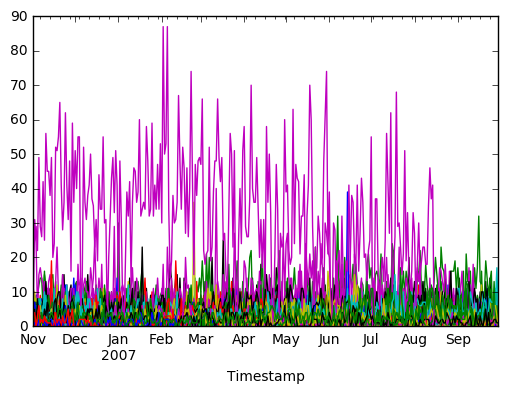

In [94]:
for column in range(len(ts3.columns)):
    try:
        ts3.loc[:, ts3.columns[column]].plot()
    except TypeError:
        pass
plt.show()

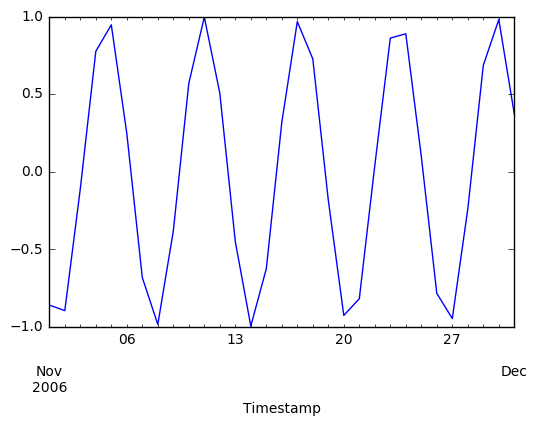

In [96]:
for column in range(len(ts2.columns))[:1]:
    ts2.loc['2006-11-01':'2006-12-01', ts2.columns[column]].plot()
plt.show()

Снова очевидная сезональность 7. Треда не видно, изменений уровня тоже. 

<h2 align="center">2. ARIMA Model real TS (70%) </h2>
You need to analyse a TS and build forecast with ARIMA model for it. 
Each student has its own TS: you can find id of yout TS that you need to forecast <a href="https://drive.google.com/open?id=1y5xgpgErIiJFYmXWB-eFYmQ6OUMocqP-VGpTIXLuzCw">here</a>. 

**I. Build ARIMA forecast yourself ** 

Also you can follow the next scheme:

 * 0) read data for TS under consideration and use the first 80% of all length of the TS as train TS.  
 * 1) plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)
 * 2) stabilize dispersion of the train TS through box-cox transformation if needed.
 * 3) if the transformed train TS is non-stationary make it stationary (remember the power of differencing $d$).
 * 4) plot ACF/PACF for  the transformed train TS in order to understand whether $AR(p)/MA(q)$ may be used.
 * 5) select set of candidate parameters for ARMA (for the train TS)
 * 6) train candidate ARIMA models (use $d$ from step 3), $p$, $q$ from step 5)), compare their AIC, choose the best model.
 * 7) check test for unbiasedness, stationarity and non-autocorrelation of the residuals of the best ARIMA model; if the tests fail you need to review your choice.
 * 8) build forecast for the initial TS (you need to transform it like in step 2)
 * 9) build forecast interval for the last 20% of the transformed initial TS. Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

In [297]:
ts = pd.read_csv('data/TS_dep42.csv', sep=';', decimal='.', parse_dates=True, dayfirst=True, index_col='Timestamp')

In [298]:
ts.head()

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
h, w = ts.shape
print(h, w)

1135 155


In [300]:
column = "item 53205"

In [301]:
train = pd.DataFrame(ts.loc[:, column][:int(h * 0.8)])

In [302]:
print(train.shape)
train.head()

(908, 1)


,item 53205
Timestamp,
2005-10-03,NaN
2005-10-04,NaN
2005-10-05,NaN
2005-10-06,NaN
2005-10-07,NaN


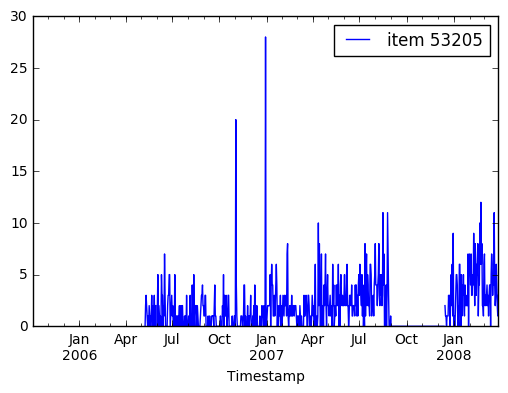

In [303]:
train.plot()
plt.show()

In [304]:
from scipy import stats
import numpy as np

In [305]:
from copy import deepcopy
train_box_cox = deepcopy(train)
train_box_cox[column] = train_box_cox[column].replace(0., 10 ** (-300))
print('optimal lambda:', stats.boxcox(train_box_cox)[1])

optimal lambda: 8.47213581172


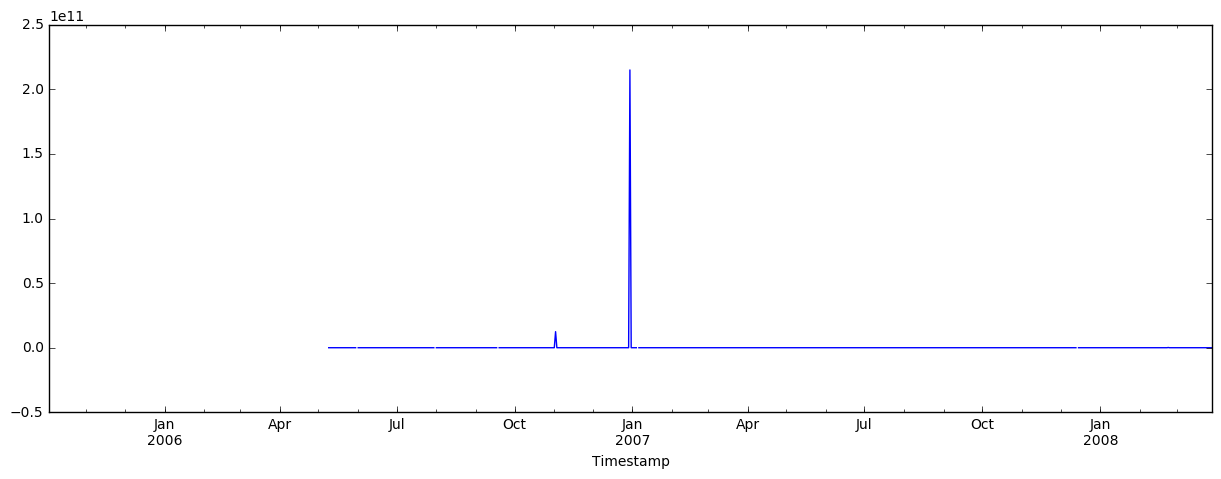

In [306]:
train_box_cox['boxcox'] = stats.boxcox(train_box_cox[column])[0]
train_box_cox['boxcox'].plot(figsize=(15,5))
plt.show()

Вообще есть какой-то подозрительный выброс, из-за которого как-то не хочется использовать преобразование бокса-кокса, и кажется, что этот выброс приходится на новый год, но при этом со вторым новым годом все впрорядке. странно это.

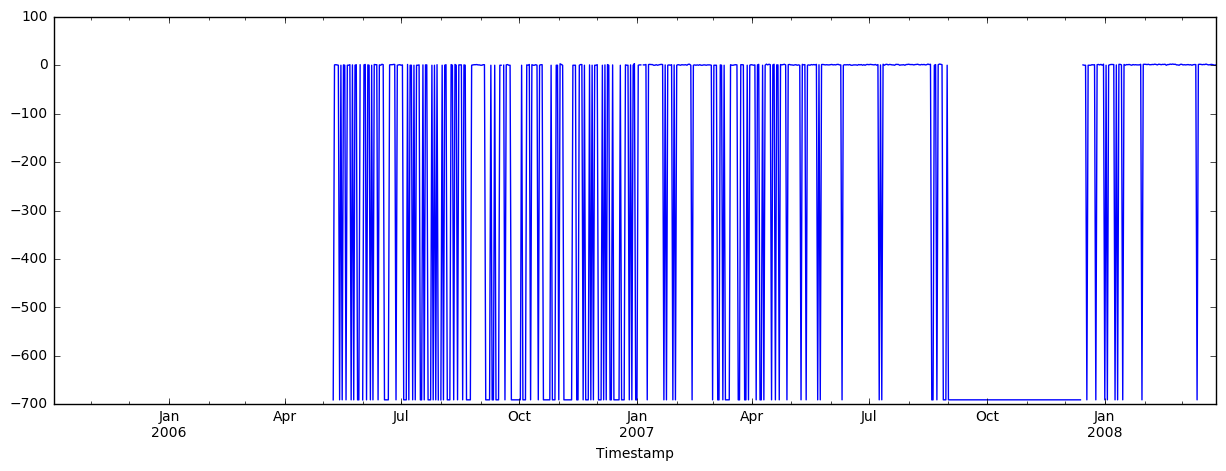

In [307]:
train_box_cox['boxcox'] = np.log(train_box_cox[column])
train_box_cox['boxcox'].plot(figsize=(15,5))
plt.show()

Бокс-кокс все делает как-то хуже :( Но и начальные данные кажется имеют пимерно одинаковую дисперсию, так что оставлю все как есть.

Узнаем есть ли сезонность тут. (вроде как должна быть, так как это второй тайм сериес)

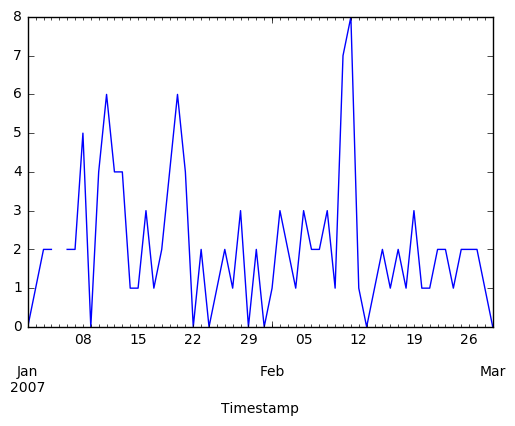

In [308]:
pd.DataFrame(train).loc["2007-01-01":"2007-03-01",column].plot()
plt.show()

Bидимо не все было сезонно все-таки во второй группе временных рядов.

Но так как кажется, что среднее увеличивается, то продифференцируем ряд.

In [309]:
diff_train = (train  - train.shift(1))
diff_train.tail()

,item 53205
Timestamp,
2008-03-24,3.0
2008-03-25,-2.0
2008-03-26,-2.0
2008-03-27,-1.0
2008-03-28,2.0


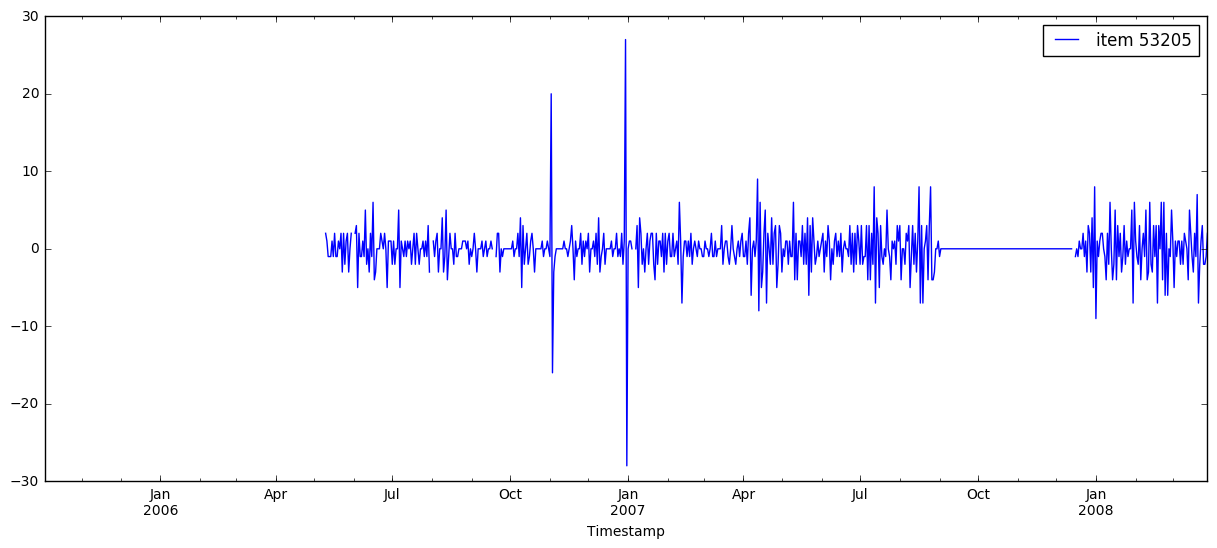

In [310]:
diff_train.plot(figsize=(15,6))
plt.show()

Ну теперь хотя бы со средним все впорядке. Дисперсия не идеальна =( Но бокс-кокс из-а нулей и выбросов тоже не огонь. :(

In [311]:
diff_values = diff_train.loc[:, column].values

In [312]:
from statsmodels.tsa import stattools
import statsmodels.api as sm

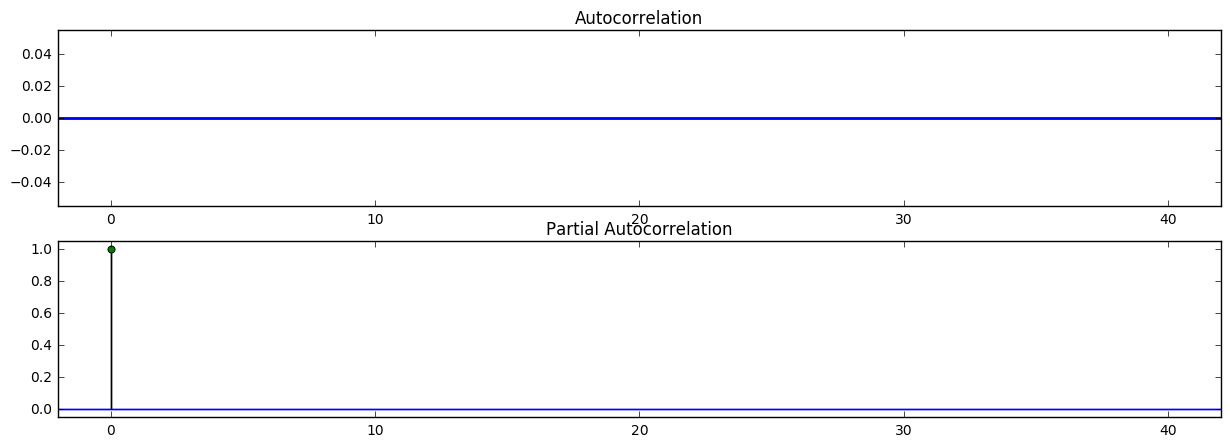

In [313]:
sm.graphics.tsa.plot_acf(diff_values, lags=40, ax=ax1)

Все норм.

d = 1 

In [314]:
PARAMS = [(0, 1, 0), (0, 1, 1), (1, 1, 0)]

Тут опять лично для моего ряда возникают проблемы с тем, что много значений тупо неопределено. :( Их либо бы доопределить (но чем?) или подобрать промежуток без дырок. (Но он будет короткий тогда) Поэтому такие параметры.

In [318]:
diff_train_ts = diff_train.dropna().loc[:, column]

^ убираем Nan для Аримы

In [319]:
diff_train_ts.head()

Timestamp
2006-05-10    2.0
2006-05-11    1.0
2006-05-12   -1.0
2006-05-13   -1.0
2006-05-14   -1.0
Name: item 53205, dtype: float64

In [320]:
for param in PARAMS:
    model = sm.tsa.ARIMA(diff_train_ts, param).fit()
    print(model.aic, model.bic, model.hqic)

4117.48216149 4126.52045607 4120.98113582
3392.7133209992026 3406.27076286 3397.9617825
3718.979407719401 3732.53684958 3724.22786922


(0, 1, 1) - лучшая модель

In [321]:
model = sm.tsa.ARIMA(diff_train_ts, (0, 1, 1)).fit()

**II. Find the best parameters of ARIMA automaticaly** 
* 0) read data for TS under consideration and use the first 80% of all length of the TS as train TS.  
* 1) plot the graph of the train TS, preprocess data (delete tail, make calendar transformation if needed)
* 2) stabilize dispersion of train TS through box-cox transformation if needed.
* 3) Run grid search for ARIMA parameters (use transformed train TS) according to AIC. Use at least 10 distinct values for $p,q,d$. How many time does it take?
* 4) Build forecast for the initial TS with best ARIMA model selected automaticaly at step 2 (you need to transform it like in step 2).
* 5) Build forecast interval for the last 20% of transformed TS. Calculate loss MACAPE of your forecast. Does the forecast look appropriate?

In [1]:
# Put your code here